In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

import warnings

warnings.filterwarnings("ignore")

In [2]:
from scipy.stats.stats import pearsonr

def corr(df: pd.DataFrame, col1: str, col2: str):
    for lag in range(0, 14):
        x = df[col1]
        y = df[col2]

        if lag != 0:
            x = x.iloc[:-lag]
            y = y.iloc[lag:]

        corr, p = pearsonr(x, y)

        if p < 0.05:
            print(f'{lag} {corr:.2f} {p:.2f}')

In [3]:
def make_df(table1: pd.DataFrame, table2: pd.DataFrame) -> pd.DataFrame:
    city_id = 1
    product = 'balance'

    # table1 = new_orders_count
    # table2 = orders_count
    df1 = table1[(table1.product_name == product) & (table1.city_id == city_id)]
    df2 = table2[(table2.product_name == product) & (table2.city_id == city_id)].rename(columns={'count': 'target'})

    df = pd.merge(df1, df2[['date', 'target']])
    return df

# load data

In [4]:
tables = [
 # 'orders_count',
 'new_orders_count',
 'custom_orders_rate',
 'discounts',
 'boxes_per_delivery',
 'fooddays_per_order'
]

root = Path('data/processed/')

In [5]:
orders_count = pd.read_csv(root / 'orders_count.csv')
orders_count.head(3)

,date,count,product_name,city_id
0,2017-01-04,0.0,fit,2
1,2017-01-06,57.0,fit,2
2,2017-01-07,0.0,fit,2


In [6]:
ts = {tname: pd.read_csv(root / f'{tname}.csv') for tname in tables}

In [7]:
for tname, table in ts.items():
    print(tname)
    df = make_df(orders_count, table)
    corr(df, 'target', 'count')
    print()

new_orders_count
0 0.48 0.00
1 0.36 0.00
2 0.30 0.00
3 0.27 0.00
4 0.26 0.00
5 0.25 0.00
6 0.27 0.00
7 0.21 0.00
8 0.21 0.00
9 0.20 0.00
10 0.19 0.00
11 0.21 0.00
12 0.21 0.00
13 0.21 0.00

custom_orders_rate
0 0.55 0.00
1 0.51 0.00
2 0.53 0.00
3 0.52 0.00
4 0.51 0.00
5 0.53 0.00
6 0.51 0.00
7 0.53 0.00
8 0.52 0.00
9 0.51 0.00
10 0.52 0.00
11 0.50 0.00
12 0.52 0.00
13 0.50 0.00

discounts
0 0.19 0.00
1 0.20 0.00
2 0.09 0.00
3 0.18 0.00
4 0.17 0.00
5 0.15 0.00
6 0.19 0.00
7 0.15 0.00
8 0.18 0.00
9 0.09 0.00
10 0.18 0.00
11 0.18 0.00
12 0.17 0.00
13 0.20 0.00

boxes_per_delivery
0 -0.34 0.00
1 -0.34 0.00
2 -0.33 0.00
3 -0.32 0.00
4 -0.33 0.00
5 -0.32 0.00
6 -0.32 0.00
7 -0.34 0.00
8 -0.35 0.00
9 -0.35 0.00
10 -0.35 0.00
11 -0.36 0.00
12 -0.34 0.00
13 -0.34 0.00

fooddays_per_order
1 -0.11 0.00
3 -0.15 0.00
4 -0.06 0.01
5 -0.09 0.00
6 -0.10 0.00
7 -0.09 0.00
8 -0.09 0.00
10 -0.13 0.00
11 -0.05 0.04
12 -0.07 0.00
13 -0.09 0.00



In [8]:
# autocorrs

<AxesSubplot:>

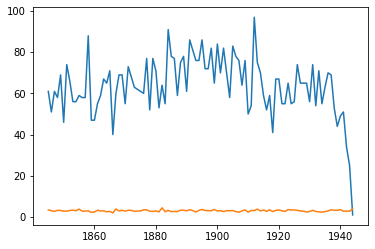

In [9]:
ds = df.iloc[-100:]
ds['count'].plot()
ds.target.plot()

In [14]:
# product names

lsts = [list(set(df.product_name.tolist())) for df in ts.values()]
ls = []
for l in lsts:
    ls += l

In [15]:
from collections import Counter

Counter(ls).most_common(100)

[('priem', 5),
 ('perekrestok', 5),
 ('m_fit', 5),
 ('bf_pack', 5),
 ('power', 5),
 ('gf_adidas', 5),
 ('balance', 5),
 ('fit', 5),
 ('breakfasts_2x', 5),
 ('super_fit', 5),
 ('daily', 5),
 ('samokat', 5),
 ('fit_express', 5),
 ('dinner', 5),
 ('rosneft', 5),
 ('cv_max', 4),
 ('daily_trial', 4),
 ('dsv_dinners', 4),
 ('dsv_breakfasts', 4),
 ('fit_trial', 4),
 ('detox', 4),
 ('super_detox_2', 4),
 ('super_detox_1', 4),
 ('cv_light', 4),
 ('balance_trial', 4),
 ('dsv', 4),
 ('basic', 4),
 ('priem_plus', 4),
 ('samokat_7', 4),
 ('daily plus', 3),
 ('vega', 3),
 ('unifood', 3),
 ('elementaree_1', 2),
 ('фитнес-бар', 2),
 ('balance_stock', 1),
 ('fit_stock', 1),
 ('fit_plus', 1),
 ('daily_stock', 1)]